In [172]:
import matplotlib.pyplot as plt
import numpy as np
from geopy import geocoders
import geonamescache
from geonamescache.mappers import country
import pandas as pd

In [173]:
group1 = ['india', 'mumbai', 'pune', 'kolkata', 'delhi', 'banglore', 'punjab','chandigarh', 'gujarat','new delhi''hyderabad']
group2 = ['usa' , 'canada', 'america','texas','unitedkingdom','london']
group3 = ['pakistan','peshawar','islamabad','mohali','rawalpindi','multan']


In [174]:
df1 = pd.read_csv('../Anti-National-Tweets-Classification/dataset/raw_dataset/khalistan_location.csv')
df2 = pd.read_csv('../Anti-National-Tweets-Classification/dataset/raw_dataset/Referendum2020_new.csv')
df_main = df2.append(df1, ignore_index = True)
df_main

,Unnamed: 0,user_id,created_at,tweet,hashtags,retweet_count,favourite_count,tweet_url,user_location,tweet_urls
0,0,b'jst1step2Biafra',2020-10-02 12:37:02,b'YESTERDAY #SitAtHomeOnOctober1st @1stOct #Ni...,"[{'text': 'SitAtHomeOnOctober1st', 'indices': ...",0,0,NaN,NaN,"[{'url': 'https://t.co/o0ckHHYVFH', 'expanded_..."
1,1,b'beingvick',2020-10-02 12:32:12,"b'RT @KhalistanIsAJo1: #Pannun - One man, mult...","[{'text': 'Pannun', 'indices': [21, 28]}, {'te...",13,0,NaN,NaN,[]
2,2,b'jst1step2Biafra',2020-10-02 12:30:56,b'YESTERDAY #SitAtHomeOnOctober1st @1stOct #Ni...,"[{'text': 'SitAtHomeOnOctober1st', 'indices': ...",0,1,NaN,NaN,"[{'url': 'https://t.co/ArUnCfJTXq', 'expanded_..."
3,3,b'Randhee25160680',2020-10-02 12:16:23,"b'RT @KhalistanIsAJo1: #Pannun - One man, mult...","[{'text': 'Pannun', 'indices': [21, 28]}, {'te...",13,0,NaN,NaN,[]
4,4,b'ogeiznltd',2020-10-02 11:20:46,b'RT @JonasMaduakolam: @MaziNnamdiKanu @nassni...,[],3,0,NaN,NaN,[]
...,...,...,...,...,...,...,...,...,...,...
3803,3318,b'VB_Subrahmanyam',2020-09-24 12:11:49,b'RT @ChiragdeepDahi1: #ShameOnKhalistaniSuppo...,"[{'text': 'ShameOnKhalistaniSupporters', 'indi...",40,0,NaN,India,[]
3804,3319,b'Sukhlee72644266',2020-09-24 12:10:35,b'RT @Gsimran07: There is no doubt that #Pakis...,"[{'text': 'Pakistan', 'indices': [38, 47]}, {'...",50,0,NaN,NaN,[]
3805,3320,b'SimranK60419840',2020-09-24 11:58:58,b'RT @Gsimran07: There is no doubt that #Pakis...,"[{'text': 'Pakistan', 'indices': [38, 47]}, {'...",50,0,NaN,NaN,[]
3806,3321,b'atulsubodh',2020-09-24 11:58:27,"b""RT @Singh_Gurmeeet: A #Sikh openly rejecting...","[{'text': 'Sikh', 'indices': [22, 27]}, {'text...",3,0,NaN,MA USA,[]


In [181]:
df_main.user_location.shape

(3808,)

In [182]:
user_locations = df_main[~ df_main['user_location'].isnull()]
location_list = []
location_list = user_locations.user_location
# print(location_list)
print(location_list.shape)

(1170,)


In [183]:
unclassified_locations = set()
predicted_locations = []
cnt1 = 0 ;cnt2 = 0;cnt3  = 0;cnt4 = 0

In [184]:
for place in location_list:
    row = {}
    try:
        value1 = place.split(',')[0].lower().replace(' ','')
        value2 = place.split(',')[1].lower().replace(' ','')

        if value1 in group1 or value2 in group1:
            cnt1 += 1
            predicted_locations.append('India')
        elif value1 in group2 or value2 in group2:
            cnt2 += 1 
            predicted_locations.append('US / UK / Canada')
        elif value1 in group3 or value2 in group3:
            cnt3 += 1 
            predicted_locations.append('Pakistan')
        else:
            temp.add(value1)
            temp.add(value2)
            cnt4 += 1
            predicted_locations.append('Not Classified')

    except Exception:
#         print('Exception:',place)
        place = place.replace(' ','')
        if place.lower() in group1:
            cnt1 += 1
            predicted_locations.append('India')
        elif place.lower() in group2:
            cnt2 += 1 
            predicted_locations.append('US / UK / Canada')
        elif place.lower() in group3:
            cnt3 += 1 
            predicted_locations.append('Pakistan')
        else:
            unclassified_locations.add(place)
            cnt4 += 1
            predicted_locations.append('Not Classified')
        
print(cnt1 ,cnt2 , cnt3 ,cnt4)

405 42 343 380


In [185]:
print(unclassified_locations)

{'', 'Aryavrat', '🌍', '9realms', 'MotherEarth', 'HyderabadIndia', 'landofcholas', 'سوچسےبھیپڑے', 'FARIDABAD', 'Hyderabad', 'Everywhere', 'Cosmos', 'Earth', 'Halloffame😎', 'akhandbharat', 'Bharat', 'भारतवर्ष', "History'sOriginPoint-India", 'Bangalore', 'rawalpindi/islamabad', '72Hoors😝', 'आर्यवर्त', 'kathua', 'TamilNadu', 'JammuAndKashmir', '#FreeKashmir', 'DevilsParadise', 'Singapore', 'Earth.', 'bhujGujarat', 'SrinagarPakistan', 'TravelIndia/Can/Aus/Amr', 'JammuAndKashmirUT', 'NewYork', 'canadakansas', 'AgeofAquarius', 'भारत-मुंबई-पंजाब-ENGLAND', 'Jamaica', 'हिंदुस्तान', 'InYourDreams', 'Antarctica-76°10\'12.4"S20°03', 'Mars', 'KarachiPakistan', 'Indiaभारत-भूमि', 'Panjab', 'Asia', 'Shillong', 'MAUSA', 'HiteshShahIsanpurAhmedabad', 'Lucknow', 'آپکےپہنچسےدور', 'SaudiArabia', 'proudIndian', '@peaceforchange', 'THEBHAARAT', 'चाहनेवालोंk❤️mनफरतवालों💀m', 'Khalistan', '🇮🇳BahuratnaVasundhara🇮🇳', 'LovePaK.Army.ISI⚘⚘', 'sanatan', 'Navimumbai', 'UK', 'NewZealand', '🇵🇰', 'پاکستان', 'IntheMoment',

In [186]:
user_locations['predicted_location'] = (predicted_locations)
user_locations['predicted_location'].shape
user_locations.to_csv('../Anti-National-Tweets-Classification/dataset/combined_dataset/locations_predicted_tagged.csv')

C:\Users\Amey\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


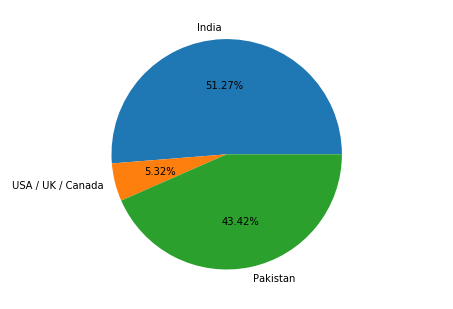

In [189]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie( [cnt1,cnt2,cnt3] , labels = ['India','USA / UK / Canada','Pakistan'] ,autopct='%1.2f%%')
plt.show()

In [144]:
analysis_dataframe = pd.read_csv('../Anti-National-Tweets-Classification/dataset/combined_dataset/data_main.csv')